In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
films_personnes = pd.read_csv("./donnees/export_films_personnes.csv", sep = '\t')
films = pd.read_csv("./donnees/export_films.csv", sep = '\t')

In [29]:
df_name = pd.read_csv("./donnees/IMDb/name.basics.tsv", sep = '\t',low_memory=False)

In [30]:
films.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'adult', 'budget', 'genres_x', 'id_tmdb',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'directors', 'writers', 'year'],
      dtype='object')

In [13]:
films = films.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1)

In [32]:
films_personnes = films_personnes.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1)

In [33]:
films_personnes.columns

Index(['adult', 'budget', 'genres', 'id_tmdb', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'directors', 'writers', 'nconst', 'category', 'characters',
       'primaryName', 'knownForTitles', 'year'],
      dtype='object')

In [34]:
films_personnes['category']

0                 actress
1                 actress
2                   actor
3                   actor
4                   actor
               ...       
217131           producer
217132           producer
217133           producer
217134    cinematographer
217135             editor
Name: category, Length: 217136, dtype: object

In [20]:
films_sans_budget = films[films['budget']==0]
films_sans_budget

,adult,budget,genres_x,id_tmdb,imdb_id,original_language,original_title,overview,popularity,poster_path,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,directors,writers,year
16,False,0,"['Comedy', 'Drama', 'Romance']",156,tt0329767,da,Wilbur begår selvmord,The strange comedy film of two close brothers;...,3.975,/bRrHJbr8kMb849IKBZ0RBk2Vmte.jpg,...,0,111,['en'],Released,Wilbur Wants to Kill Himself,6.474,76,nm0771054,"nm0771054,nm0421314",2002
23,False,0,['Drama'],206,tt0287624,en,Paradise Found,Paradise Found is a biography about the painte...,3.331,/i5tYnEeCAPODbEbbwYmNd8Y9seA.jpg,...,0,89,['en'],Released,Paradise Found,6.600,21,nm0028196,"nm0028196,nm0326089",2003
40,False,0,['Drama'],337,tt0329388,fr,Monsieur Ibrahim et les Fleurs du Coran,"Paris, 1960s. Momo, a resolute and independent...",9.028,/lS4hx9X5v6cpoCzzQohZs7zD881.jpg,...,11576431,91,"['fr', 'tr']",Released,Monsieur Ibrahim,7.028,125,nm0243191,"nm0243191,nm0773418",2003
41,False,0,['Crime'],341,tt0489010,en,A Crime,Vincent's life is on hold until he finds his w...,4.452,/ms5tA7A2xc1EOqc2mVvcFrnH6gO.jpg,...,0,103,['en'],Released,A Crime,5.759,29,nm0694946,"nm0070152,nm0694946",2006
42,False,0,['Comedy'],349,tt0428430,fr,Crustacés et coquillages,Crustacés et coquillages is a fresh French com...,2.664,/eQPrrzj76pQxmprQ3LpHhriZqlJ.jpg,...,0,93,['fr'],Released,Cockles and Muscles,6.100,28,"nm0239725,nm0553303","nm0239725,nm0553303",2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,False,0,['Drama'],215034,tt3118628,en,Bastardo,Larger-than-life characters populate director ...,1.378,/kB7iD9kXd0gAwdq8L6l4FcEcXQc.jpg,...,0,106,['ar'],Released,Bastard,7.000,1,nm0067946,"nm0067946,nm2144991",2013
11012,False,0,['Drama'],219173,tt1576452,es,Por tu culpa,"Are we what others see, or are we what we allo...",0.743,/hzwxXtf72bgajNHRZrrWPlfhJSX.jpg,...,0,87,['es'],Released,It's Your Fault,6.000,5,nm1318393,"nm1318393,nm1196938",2010
11013,False,0,['Action'],222409,tt1512732,en,Braille,Nick's blindness is symbolic to his regret for...,0.824,/1DxERMJ0vi9IoDnO4QM6HNrzvdW.jpg,...,0,90,[],Released,Braille,6.000,1,nm2065393,"nm2065393,nm1863128",2011
11014,False,0,['Documentary'],228655,tt2007418,fr,Les trois disparitions de Soad Hosni,This haunting and beautifully formed documenta...,0.840,/ttVoObIPbqBflOguONw9Dm6w1qa.jpg,...,0,70,"['ar', 'en', 'fr']",Released,The Three Disappearances of Soad Hosni,6.000,1,nm1645751,nm1645751,2011


In [21]:
films_avec_budget = films.drop(films_sans_budget.index,axis=0)
films_avec_budget

,adult,budget,genres_x,id_tmdb,imdb_id,original_language,original_title,overview,popularity,poster_path,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,directors,writers,year
0,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,40031879,141,['en'],Released,Dancer in the Dark,7.881,1555,nm0001885,"nm0001885,nm0797604",2000
1,False,140000000,"['Adventure', 'Fantasy', 'Action']",22,tt0325980,en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 18th-century pira...",88.516,/z8onk7LV9Mmw6zKz4hT6pzzvmvl.jpg,...,655011224,143,['en'],Released,Pirates of the Caribbean: The Curse of the Bla...,7.800,18710,nm0893659,"nm0254645,nm0744429,nm0064181,nm0938684",2003
2,False,30000000,"['Action', 'Crime']",24,tt0266697,en,Kill Bill: Vol. 1,"An assassin is shot by her ruthless employer, ...",31.556,/v7TaX8kXMXs5yFFGR41guUDNcnB.jpg,...,180906076,111,"['en', 'ja', 'fr']",Released,Kill Bill: Vol. 1,7.970,15748,nm0000233,"nm0000233,nm0000235",2003
3,False,200000000,"['Adventure', 'Fantasy', 'Action']",58,tt0383574,en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,71.717,/uXEqmloGyP7UXAiphJUu2v2pcuE.jpg,...,1065659812,151,"['en', 'tr', 'el', 'zh']",Released,Pirates of the Caribbean: Dead Man's Chest,7.340,14465,nm0893659,"nm0254645,nm0744429,nm0064181,nm0938684",2006
4,False,2000000,"['Thriller', 'Crime', 'Drama']",67,tt0445620,en,Paradise Now,Two childhood friends are recruited for a suic...,7.400,/qWZkYa8VdcDZk8uzRB2PfhpM9IL.jpg,...,3395627,90,"['ar', 'en']",Released,Paradise Now,6.941,219,nm0009463,"nm0009463,nm1178208,nm0388293",2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10979,False,1288420,"['Action', 'Drama', 'Thriller']",150009,tt2560016,hi,Rajdhani Express,An eclectic group of passengers travelling fro...,0.883,/eqBaH92kA4x4TW4qp5Ik8wTroX9.jpg,...,0,170,"['en', 'hi']",Released,Rajdhani Express,9.000,1,nm5414667,nm5414667,2013
10984,False,850000,"['Comedy', 'Romance']",173779,tt2106590,fr,Ouf,"François has everything he could ever want, un...",1.050,/xkdX47g7H65sWxi2j3SxUK7CXeH.jpg,...,0,81,['fr'],Released,Nuts,5.800,6,nm0179856,"nm0179856,nm0277230",2013
10991,False,12000000,['Comedy'],182219,tt2276778,fr,Les Profs,With only 12 percent of its pupils obtaining t...,0.600,/59Bi4wtdoxXV9eaPat7em2ahISI.jpg,...,0,88,"['cs', 'fr']",Released,Serial Teachers,5.462,1134,nm0553237,"nm0553237,nm2059904,nm6317807,nm6317808",2013
10994,False,6900000,"['Action', 'Crime', 'Drama', 'History']",188640,tt2301155,hi,शूटआऊट ऍट वडाला,The first-ever registered encounter by the Mum...,0.600,/qFcNJCXd2G18ngq4rFq601MbqbZ.jpg,...,11000000,150,['hi'],Released,Shootout at Wadala,5.900,26,nm0348495,"nm1693210,nm3871075,nm0348495,nm1386575,nm1583...",2013


In [22]:
films_stat = films.describe()
films_stat

,budget,id_tmdb,popularity,revenue,runtime,vote_average,vote_count,year
count,1.101600e+04,1.101600e+04,11016.000000,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000
mean,8.730612e+06,3.273972e+05,12.331942,2.295363e+07,106.592139,6.402284,535.935639,2013.111111
std,3.034022e+07,2.834227e+05,79.700913,1.149983e+08,23.136506,0.877658,1976.772301,6.372532
min,0.000000e+00,1.600000e+01,0.600000,0.000000e+00,60.000000,5.003000,0.000000,2000.000000
25%,0.000000e+00,5.991700e+04,1.809000,0.000000e+00,91.000000,5.800000,8.750000,2008.000000
50%,0.000000e+00,2.869625e+05,4.222000,0.000000e+00,101.000000,6.300000,33.000000,2014.000000
75%,7.453750e+04,5.191260e+05,9.447750,0.000000e+00,117.000000,6.900000,169.000000,2018.000000
max,5.793304e+08,1.114210e+06,4665.438000,2.923706e+09,495.000000,10.000000,33630.000000,2023.000000


In [38]:
budget_moyen = films_avec_budget['budget'].groupby(films_avec_budget['year']).mean()
budget_moyen

year
2000    3.362226e+07
2001    3.865007e+07
2002    3.480317e+07
2003    3.805469e+07
2004    3.578136e+07
2005    3.659154e+07
2006    3.282344e+07
2007    2.992344e+07
2008    3.394310e+07
2009    2.843755e+07
2010    2.883490e+07
2011    2.943699e+07
2012    3.315063e+07
2013    3.461152e+07
2014    3.727998e+07
2015    3.313719e+07
2016    3.299649e+07
2017    3.398900e+07
2018    3.697263e+07
2019    3.549750e+07
2020    3.072006e+07
2021    3.801976e+07
2022    3.635148e+07
2023    2.454423e+07
Name: budget, dtype: float64

In [39]:
budget_min = films_avec_budget['budget'].groupby(films_avec_budget['year']).min()
budget_min

year
2000     46000
2001        50
2002         2
2003         8
2004     74050
2005    500000
2006        24
2007        16
2008         1
2009        10
2010       200
2011         1
2012         5
2013         7
2014         1
2015         9
2016         1
2017       150
2018         1
2019        20
2020         2
2021     10000
2022       300
2023      5000
Name: budget, dtype: int64

In [40]:
budget_max = films_avec_budget['budget'].groupby(films_avec_budget['year']).max()
budget_max

year
2000    125000000
2001    140000000
2002    140000000
2003    200000000
2004    200000000
2005    207000000
2006    270000000
2007    300000000
2008    200000000
2009    237000000
2010    200000000
2011    379000000
2012    250000000
2013    250000000
2014    250000000
2015    365000000
2016    250000000
2017    300000000
2018    579330426
2019    356000000
2020    205000000
2021    250000000
2022    460000000
2023    250000000
Name: budget, dtype: int64

In [102]:
budget1 = pd.merge(budget_max, budget_min,how='left',on='year')

In [103]:
budget = pd.merge(budget1, budget_moyen,on='year')

In [104]:
budget

,budget_x,budget_y,budget
year,,,
2000,125000000,46000,3.362226e+07
2001,140000000,50,3.865007e+07
2002,140000000,2,3.480317e+07
2003,200000000,8,3.805469e+07
2004,200000000,74050,3.578136e+07
2005,207000000,500000,3.659154e+07
2006,270000000,24,3.282344e+07
2007,300000000,16,2.992344e+07
2008,200000000,1,3.394310e+07


In [105]:
budget = budget.rename(columns={'budget_x':'budget_max','budget_y':'budget_min','budget':'budget_moyen'})

In [106]:
budget = budget.reset_index(drop=False)

In [107]:
budget.to_csv("./donnees/budget.csv",index=False)

In [9]:
budget = pd.read_csv("./donnees/budget.csv",low_memory=False)
budget

,year,budget_max,budget_min,budget_moyen
0,2000,125000000,46000,3.362226e+07
1,2001,140000000,50,3.865007e+07
2,2002,140000000,2,3.480317e+07
3,2003,200000000,8,3.805469e+07
4,2004,200000000,74050,3.578136e+07
5,2005,207000000,500000,3.659154e+07
6,2006,270000000,24,3.282344e+07
7,2007,300000000,16,2.992344e+07
8,2008,200000000,1,3.394310e+07
9,2009,237000000,10,2.843755e+07


In [10]:
budget = budget.astype('int64')

In [11]:
budget

,year,budget_max,budget_min,budget_moyen
0,2000,125000000,46000,33622262
1,2001,140000000,50,38650065
2,2002,140000000,2,34803166
3,2003,200000000,8,38054690
4,2004,200000000,74050,35781358
5,2005,207000000,500000,36591542
6,2006,270000000,24,32823435
7,2007,300000000,16,29923442
8,2008,200000000,1,33943103
9,2009,237000000,10,28437554


In [40]:
nb_films_langue = films['original_language'].groupby(films['original_language']).count()
nb_films_langue

original_language
af      3
am      2
ar    122
as      1
az      2
     ... 
vi     18
xh      1
xx      5
yi      2
zh    341
Name: original_language, Length: 90, dtype: int64

In [41]:
nb_films_langue.value_counts()

original_language
1       13
2       11
3        6
4        5
6        5
8        3
7        2
40       2
341      2
26       2
5        2
29       2
49       2
33       2
27       1
47       1
136      1
45       1
373      1
243      1
121      1
96       1
34       1
35       1
15       1
98       1
340      1
17       1
10       1
3412     1
122      1
11       1
185      1
14       1
39       1
130      1
349      1
698      1
44       1
22       1
2943     1
43       1
9        1
153      1
18       1
Name: count, dtype: int64

In [ ]:
films_sans_revenue = films[films['revenue']==0]
films_sans_revenue

In [ ]:
films_avec_revenue = films.drop(films_sans_revenue.index,axis=0)
films_avec_revenue

In [16]:
revenue_moyen = films_avec_revenue['revenue'].groupby(films_avec_revenue['year']).mean()
revenue_moyen

year
2000    7.756277e+07
2001    8.316435e+07
2002    7.923036e+07
2003    9.857512e+07
2004    7.952402e+07
2005    7.225733e+07
2006    7.767598e+07
2007    7.881006e+07
2008    9.646251e+07
2009    9.036840e+07
2010    6.666557e+07
2011    8.837484e+07
2012    7.922903e+07
2013    9.022888e+07
2014    1.130750e+08
2015    1.141693e+08
2016    8.714075e+07
2017    1.189214e+08
2018    1.274811e+08
2019    9.925663e+07
2020    4.334437e+07
2021    8.235871e+07
2022    1.375949e+08
2023    1.314529e+08
Name: revenue, dtype: float64

In [17]:
revenue_min = films_avec_revenue['revenue'].groupby(films_avec_revenue['year']).min()
revenue_min

year
2000        28
2001        60
2002       921
2003        54
2004        21
2005        27
2006         2
2007         6
2008        10
2009        10
2010       200
2011     11229
2012         5
2013        12
2014         1
2015      5000
2016         3
2017         9
2018        24
2019      1000
2020     46855
2021        10
2022      1000
2023    159959
Name: revenue, dtype: int64

In [18]:
revenue_max = films_avec_revenue['revenue'].groupby(films_avec_revenue['year']).max()
revenue_max

year
2000     546388105
2001     871368364
2002     926287400
2003    1118888979
2004     783766341
2005     850000000
2006    1065659812
2007     961000000
2008    1004558444
2009    2923706026
2010     825532764
2011    1123794079
2012    1518815515
2013    1215577205
2014    1104054072
2015    2068223624
2016    1153337496
2017    1332698830
2018    2046239637
2019    2794731755
2020     503063688
2021    1921847111
2022    2319331580
2023     604380922
Name: revenue, dtype: int64

In [32]:
revenue = pd.merge(revenue_max, revenue_moyen, how='left', on='year')

In [36]:
revenue.rename(columns={'revenue_x':'revenu_max', 'revenue_y': 'revenu_moyen'},inplace=True)

In [38]:
revenue = revenue.reset_index(drop=False)

In [39]:
revenue.to_csv("./donnees/revenue.csv",index=False)

In [ ]:
films_budget_revenue = films_avec_budget[films_avec_budget['revenue']>0]
films_budget_revenue 

In [ ]:
films_budget_revenue['profit'] = films_budget_revenue['revenue'] - films_budget_revenue['budget']
films_budget_revenue

In [27]:
import seaborn as sns

<Axes: xlabel='revenue', ylabel='budget'>

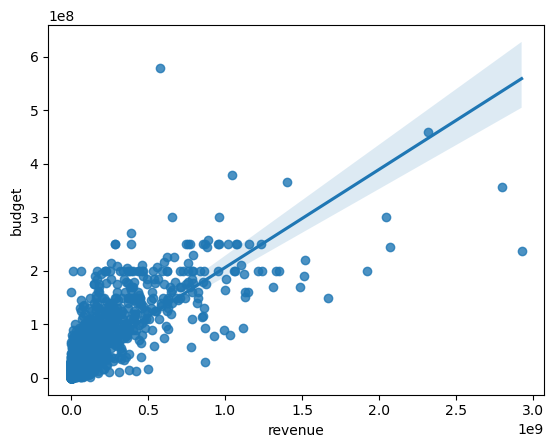

In [28]:
sns.regplot(films_budget_revenue, x='revenue', y='budget')

In [50]:
films_budget_revenue_moy = films_budget_revenue['profit'].groupby(films_budget_revenue['year']).mean()

films_budget_revenue_moy 

year
2000    5.266275e+07
2001    5.079314e+07
2002    6.847077e+07
2003    8.118918e+07
2004    5.594078e+07
2005    4.632403e+07
2006    5.134742e+07
2007    6.261482e+07
2008    8.273941e+07
2009    7.575278e+07
2010    4.820071e+07
2011    6.407330e+07
2012    6.986431e+07
2013    7.459862e+07
2014    1.139739e+08
2015    1.173018e+08
2016    7.244923e+07
2017    1.213897e+08
2018    1.392400e+08
2019    1.107032e+08
2020    3.609576e+07
2021    5.565722e+07
2022    1.557529e+08
2023    1.051777e+08
Name: profit, dtype: float64

In [51]:
films_budget_revenue_min = films_budget_revenue['profit'].groupby(films_budget_revenue['year']).min()

films_budget_revenue_min 

year
2000    -46536031
2001    -61403089
2002    -48367617
2003    -36064237
2004    -37821105
2005    -69833498
2006    -63093812
2007    -41696962
2008    -31361837
2009    -44668279
2010    -72822007
2011    -34554000
2012    -37812187
2013    -68351500
2014    -31657368
2015    -52247060
2016    -60506085
2017    -63587851
2018    -27864000
2019    -26859030
2020   -133200000
2021   -185600000
2022    -78704637
2023    -43000000
Name: profit, dtype: int64

In [52]:
films_budget_revenue_max = films_budget_revenue['profit'].groupby(films_budget_revenue['year']).max()

films_budget_revenue_max 

year
2000     421388105
2001     778368364
2002     847287400
2003    1024888979
2004     583766341
2005     737000000
2006     865659812
2007     661000000
2008     819558444
2009    2686706026
2010     665532764
2011     928794079
2012    1298815515
2013    1015577205
2014     894054072
2015    1823223624
2016     903337496
2017    1132698830
2018    1746239637
2019    2438731755
2020     487263688
2021    1721847111
2022    1859331580
2023     530579095
Name: profit, dtype: int64

In [53]:
df_langue = pd.DataFrame(columns=['language','nombre'])


for i in films['spoken_languages'].items():
    # print(i)
    # print(i[1])
    # print(type(i[1]))
    string_langue = i[1]
    string_langue = string_langue.replace("['","")
    string_langue = string_langue.replace("']","")
    string_langue = string_langue.replace("'","")
    liste_langue = string_langue.split(", ")
    # print(liste_langue)
    # print(len(liste_langue))
    # for langue in liste_langue :
    #     # print(langue)
    #     if langue not in df_langue['language'].values:
    #         df_langue.loc[df_langue.index, langue]=1
    #     else :
    #         df_langue.loc[df_langue.index,langue]+=1
    for langue in liste_langue:
        if langue not in df_langue['language'].values:
            # Ajouter une nouvelle ligne
            new_row = pd.DataFrame({'language': [langue], 'nombre': [1]})
            df_langue = pd.concat([df_langue, new_row], ignore_index=True)
        else:
            # Incrémenter le compteur
            idx = df_langue[df_langue['language'] == langue].index
            df_langue.loc[idx, 'nombre'] += 1
df_langue

,language,nombre
0,en,4228
1,ja,896
2,fr,3477
3,tr,113
4,el,74
...,...,...
128,lb,2
129,oc,1
130,st,1
131,an,1


In [54]:
df_directeur = pd.DataFrame(columns=['director','nombre'])


for i in films['directors'].items():

    liste_directeur = i[1].split(",")
    for directeur in liste_directeur:
        if directeur not in df_directeur['director'].values:
            # Ajouter une nouvelle ligne
            new_row = pd.DataFrame({'director': [directeur], 'nombre': [1]})
            df_directeur = pd.concat([df_directeur, new_row], ignore_index=True)
        else:
            # Incrémenter le compteur
            idx = df_directeur[df_directeur['director'] == directeur].index
            df_directeur.loc[idx, 'nombre'] += 1
df_directeur

,director,nombre
0,nm0001885,11
1,nm0893659,5
2,nm0000233,7
3,nm0009463,1
4,nm0197636,1
...,...,...
7756,nm0067946,1
7757,nm1318393,1
7758,nm2065393,1
7759,nm1645751,1


In [55]:
df_directeur_avec_nom = pd.merge(df_directeur,df_name,how='left',left_on='director',right_on='nconst')
df_directeur_avec_nom.head()

,director,nombre,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0001885,11,nm0001885,Lars von Trier,1956,\N,"writer,director,producer","tt0168629,tt4003440,tt1527186,tt0870984"
1,nm0893659,5,nm0893659,Gore Verbinski,1964,\N,"director,producer,writer","tt1192628,tt0325980,tt4731136,tt1210819"
2,nm0000233,7,nm0000233,Quentin Tarantino,1963,\N,"producer,writer,actor","tt0105236,tt0110912,tt0116367,tt7131622"
3,nm0009463,1,nm0009463,Hany Abu-Assad,1961,\N,"director,writer,producer","tt2852406,tt0445620,tt0305229,tt4686692"
4,nm0197636,1,nm0197636,Stephen Daldry,1960,\N,"producer,director,miscellaneous","tt0976051,tt0274558,tt0249462,tt0477302"


In [56]:
df_directeur_avec_nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   director           7761 non-null   object
 1   nombre             7761 non-null   object
 2   nconst             7758 non-null   object
 3   primaryName        7758 non-null   object
 4   birthYear          7758 non-null   object
 5   deathYear          7758 non-null   object
 6   primaryProfession  7758 non-null   object
 7   knownForTitles     7758 non-null   object
dtypes: object(8)
memory usage: 485.2+ KB


In [57]:
df_direct = df_directeur_avec_nom.drop(['nconst','birthYear','deathYear','primaryProfession','knownForTitles'],axis=1)
df_direct.head()

,director,nombre,primaryName
0,nm0001885,11,Lars von Trier
1,nm0893659,5,Gore Verbinski
2,nm0000233,7,Quentin Tarantino
3,nm0009463,1,Hany Abu-Assad
4,nm0197636,1,Stephen Daldry


In [58]:
df_ecrivain = pd.DataFrame(columns=['ecrivain','nombre'])


for i in films['writers'].items():

    liste_ecrivain = i[1].split(",")
    for ecrit in liste_ecrivain:
        if ecrit not in df_ecrivain['ecrivain'].values:
            # Ajouter une nouvelle ligne
            new_row = pd.DataFrame({'ecrivain': [ecrit], 'nombre': [1]})
            df_ecrivain = pd.concat([df_ecrivain, new_row], ignore_index=True)
        else:
            # Incrémenter le compteur
            idx = df_ecrivain[df_ecrivain['ecrivain'] == ecrit].index
            df_ecrivain.loc[idx, 'nombre'] += 1
df_ecrivain

KeyboardInterrupt: 

In [ ]:
df_ecrivain_avec_nom = pd.merge(df_ecrivain,df_name,how='left',left_on='ecrivain',right_on='nconst')
df_ecrivain_avec_nom.head()

,ecrivain,nombre,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0001885,11,nm0001885,Lars von Trier,1956,\N,"writer,director,producer","tt0168629,tt4003440,tt1527186,tt0870984"
1,nm0797604,2,nm0797604,Sjón,1962,\N,"writer,script_department,actor","tt11138512,tt9812474,tt0168629,tt0461958"
2,nm0254645,8,nm0254645,Ted Elliott,1961,\N,"writer,producer,miscellaneous","tt0126029,tt1210819,tt0325980,tt0103639"
3,nm0744429,10,nm0744429,Terry Rossio,\N,\N,"writer,producer,director","tt0103639,tt0325980,tt0126029,tt0453467"
4,nm0064181,9,nm0064181,Stuart Beattie,\N,\N,"writer,producer,director","tt14174940,tt0369339,tt0325980,tt0441881"


In [ ]:
ecrivain = df_ecrivain_avec_nom.drop(['nconst','birthYear','deathYear','primaryProfession','knownForTitles'],axis=1)
ecrivain.head()

,ecrivain,nombre,primaryName
0,nm0001885,11,Lars von Trier
1,nm0797604,2,Sjón
2,nm0254645,8,Ted Elliott
3,nm0744429,10,Terry Rossio
4,nm0064181,9,Stuart Beattie


In [ ]:
ecrivain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14820 entries, 0 to 14819
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ecrivain     14820 non-null  object
 1   nombre       14820 non-null  object
 2   primaryName  14818 non-null  object
dtypes: object(3)
memory usage: 347.5+ KB


In [ ]:
films_personnes['category'].value_counts()

category
actor                  70721
actress                34055
producer               22430
writer                 22395
editor                 12820
director               12117
composer               11698
cinematographer        11286
casting_director        8828
production_designer     7467
self                    2812
archive_footage          491
archive_sound             16
Name: count, dtype: int64

In [ ]:
films_acteurs = films_personnes[(films_personnes['category']=='actor') | (films_personnes['category']=='actress') ]
films_acteurs.head()

,adult,budget,genres,id_tmdb,imdb_id,original_language,original_title,overview,popularity,poster_path,...,vote_average,vote_count,directors,writers,nconst,category,characters,primaryName,knownForTitles,year
0,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001951,actress,"[""Selma Jezkova""]",Björk,"tt0168629,tt11138512,tt0138545,tt0110413",2000
1,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0000366,actress,"[""Kathy""]",Catherine Deneuve,"tt0283832,tt0061395,tt0168629,tt0058450",2000
2,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001556,actor,"[""Bill Houston""]",David Morse,"tt0120689,tt0887912,tt0117500,tt0816711",2000
3,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001780,actor,"[""Jeff""]",Peter Stormare,"tt0116282,tt0168629,tt0355295,tt0360486",2000
4,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001297,actor,"[""Oldrich Novy""]",Joel Grey,"tt0068327,tt0089901,tt0168629,tt1024715",2000


In [ ]:
films_acteurs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104776 entries, 0 to 217126
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 104776 non-null  bool   
 1   budget                104776 non-null  int64  
 2   genres                104776 non-null  object 
 3   id_tmdb               104776 non-null  int64  
 4   imdb_id               104776 non-null  object 
 5   original_language     104776 non-null  object 
 6   original_title        104776 non-null  object 
 7   overview              104776 non-null  object 
 8   popularity            104776 non-null  float64
 9   poster_path           104776 non-null  object 
 10  production_countries  104776 non-null  object 
 11  release_date          104776 non-null  object 
 12  revenue               104776 non-null  int64  
 13  runtime               104776 non-null  int64  
 14  spoken_languages      104776 non-null  object 
 15  statu

In [ ]:
df_acteurs = pd.DataFrame(columns=['acteurs','nombre'])


for i in films_acteurs['primaryName'].items():

    acteurs = i[1]
    if acteurs not in df_acteurs['acteurs'].values:
            # Ajouter une nouvelle ligne
            new_row = pd.DataFrame({'acteurs': [acteurs], 'nombre': [1]})
            df_acteurs = pd.concat([df_acteurs, new_row], ignore_index=True)
    else:
            # Incrémenter le compteur
            idx = df_acteurs[df_acteurs['acteurs'] == acteurs].index
            df_acteurs.loc[idx, 'nombre'] += 1
df_acteurs

,acteurs,nombre
0,Björk,1
1,Catherine Deneuve,35
2,David Morse,6
3,Peter Stormare,19
4,Joel Grey,1
...,...,...
54130,Megan Drury,1
54131,Nicholas Baldas,1
54132,Stephanie Bendixsen,1
54133,Julian Guevara,1


In [2]:
import pandas as pd

In [3]:
df_acteur_genre = pd.read_csv("./donnees/df_acteur_genre.csv", sep='\t', low_memory=False)

In [4]:
df_acteur_genre.sort_values('nombre',ascending=False, inplace=True)


In [5]:
df_acteur_genre = df_acteur_genre.head(100)

In [6]:
df_acteur_genre

,Unnamed: 0,acteur,genre,nombre
8272,8272,Prakash Raj,Action,216
8275,8275,Nassar,Action,205
9628,9628,Brahmanandam,Comedy,154
168,168,Bruce Willis,Thriller,137
1187,1187,Jackie Chan,Action,137
...,...,...,...,...
587,587,Monica Bellucci,Adventure,71
4648,4648,Madeleine Blaustein,Adventure,70
7214,7214,Hiroaki Hirata,Action,70
8002,8002,Nicolas Duvauchelle,Thriller,70


In [8]:
df_acteur_genre[df_acteur_genre['acteur']=='Bruce Willis']

,Unnamed: 0,acteur,genre,nombre
168,168,Bruce Willis,Thriller,137
